In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df=pd.read_csv('Iris.csv')
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
df.shape#veri setideki satır ve sütunları gösteriyorkodla alakalıdeğil

(150, 5)

In [55]:
df.shape#veri setideki satır ve sütunları gösteriyorkodla alakalıdeğil

(150, 5)

In [56]:
df.info()#boş değerleri tesbit etmek amacı ile kullanıdım

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [57]:
X=df.drop(columns=['Species'])#X girdiler y hedefimiz yani tahminimiz
y=df['Species']

<AxesSubplot:>

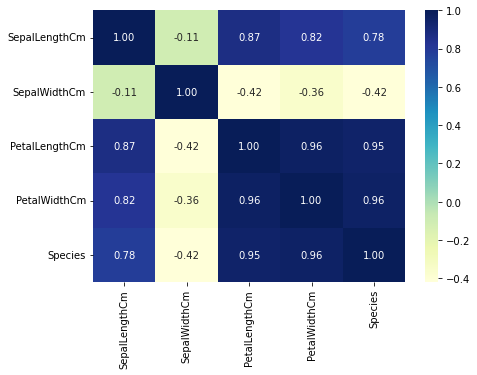

In [58]:
#korelasyon matrisi oluşturuyoruz 
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='YlGnBu')

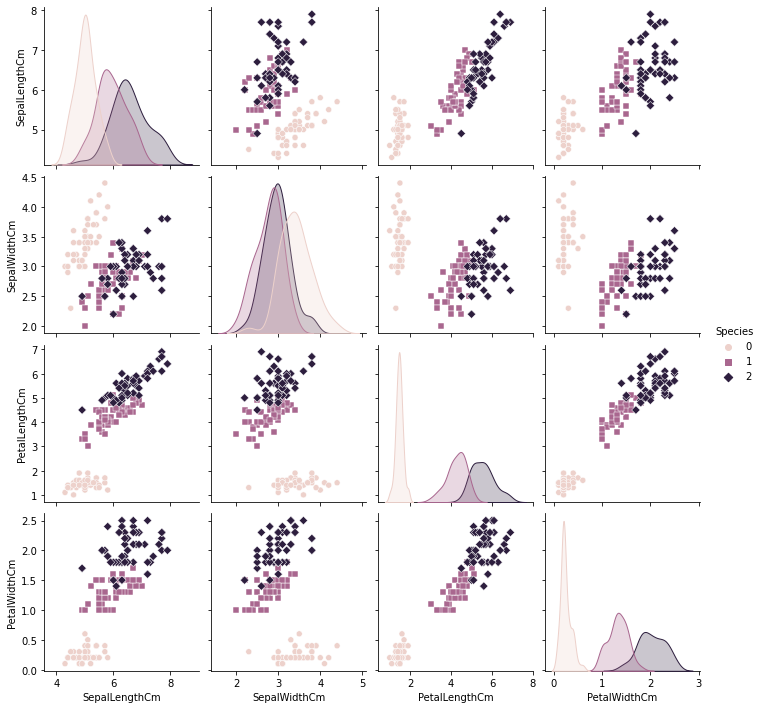

In [59]:
sns.pairplot(df,hue='Species',markers=["o", "s", "D"])#saçılım diyagramı için

In [60]:
#eğitim verileri modelin öğreneceği veriler
#test verileri modelin görünmeyen veriler üzerinde 
#ne kadar iyi performans gösterdiğini göstermek için kullandığımız verilerdir
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X, y, test_size=0.8, random_state=0)

In [61]:
#ilk iki paremetre girdi ve hedef verilerimiz olan X ve y veilerimiz 
#tüm verilerin %30'u test için kullanılsın
#yani verilerin % 70'lik kısmını modelin öğrenmesi eğitim verileri  



In [62]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train=scaling_x.fit_transform(X_train)
X_test=scaling_x.transform(X_test)
#işlev ve ortalamayı kaldırıyoruz ve birim varyansa ölçeklendiriyoruz 
#özellikleri standartlaştırmış oluyoruz 

In [63]:
from sklearn.ensemble import RandomForestClassifier


In [64]:
#k-NN ilk algoritmamız 


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.predict(X_test)
knnc=knn.score(X_test,y_test)
knnc

0.8833333333333333

In [66]:
#modelimizin doğruluk oranı %97'dir

In [67]:
y_pred=knn.predict(X_test)
#test verilerinin tahmin değerlerini oluşturuyorum


Text(0.5, 24.0, 'Tahmin etiketleri')

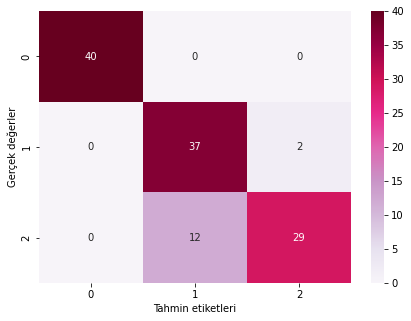

In [68]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(mat, annot=True, fmt='.0f', cmap='PuRd')
plt.ylabel('Gerçek değerler')#y eksemi
plt.xlabel('Tahmin etiketleri')

In [69]:
from sklearn.metrics import classification_report
target_names=["Iris-setosa ","Iris-versicolor","Iris-virginica"]

In [70]:
print(classification_report(y_test, y_pred,target_names=target_names))

                 precision    recall  f1-score   support

   Iris-setosa        1.00      1.00      1.00        40
Iris-versicolor       0.76      0.95      0.84        39
 Iris-virginica       0.94      0.71      0.81        41

       accuracy                           0.88       120
      macro avg       0.90      0.89      0.88       120
   weighted avg       0.90      0.88      0.88       120



In [71]:
"""from sklearn import metrics 
hesaplanan=knn.predict(X_test)

print(hesaplanan )
"""

'from sklearn import metrics \nhesaplanan=knn.predict(X_test)\n\nprint(hesaplanan )\n'

In [72]:
#RandomForestClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
rf.predict(X_test)
rfc=rf.score(X_test,y_test)
rfc


0.9166666666666666

In [74]:
y_pred=rf.predict(X_test)

Text(0.5, 24.0, 'Tahmin etiketleri')

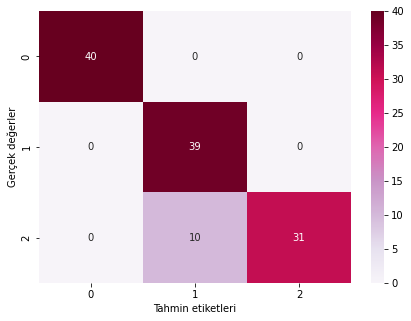

In [75]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(mat, annot=True, fmt='.0f', cmap='PuRd')
plt.ylabel('Gerçek değerler')#y eksemi
plt.xlabel('Tahmin etiketleri')#x ekseni

In [76]:
from sklearn.metrics import classification_report
target_names=["Iris-setosa ","Iris-versicolor","Iris-virginica"]
print(classification_report(y_test, y_pred,target_names=target_names))

                 precision    recall  f1-score   support

   Iris-setosa        1.00      1.00      1.00        40
Iris-versicolor       0.80      1.00      0.89        39
 Iris-virginica       1.00      0.76      0.86        41

       accuracy                           0.92       120
      macro avg       0.93      0.92      0.92       120
   weighted avg       0.93      0.92      0.92       120



In [77]:
"""from sklearn import metrics 
hesaplanan=knn.predict(X_test)

print(hesaplanan )"""

'from sklearn import metrics \nhesaplanan=knn.predict(X_test)\n\nprint(hesaplanan )'

In [78]:
#lojistik regrasyon

In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
lrc=lr.score(X_test,y_test)
lrc

0.8666666666666667

In [80]:
y_pred=lr.predict(X_test)

Text(0.5, 24.0, 'Tahmin etiketleri')

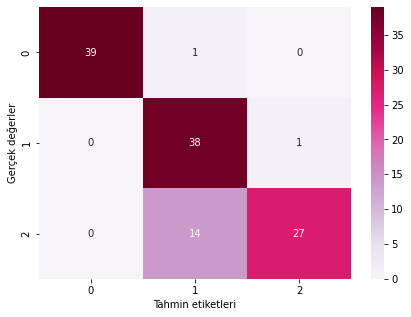

In [81]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(mat, annot=True, fmt='.0f', cmap='PuRd')
plt.ylabel('Gerçek değerler')#y eksemi
plt.xlabel('Tahmin etiketleri')#x ekseni

In [82]:
from sklearn.metrics import classification_report
target_names=["Iris-setosa ","Iris-versicolor","Iris-virginica"]
print(classification_report(y_test, y_pred,target_names=target_names))

                 precision    recall  f1-score   support

   Iris-setosa        1.00      0.97      0.99        40
Iris-versicolor       0.72      0.97      0.83        39
 Iris-virginica       0.96      0.66      0.78        41

       accuracy                           0.87       120
      macro avg       0.89      0.87      0.87       120
   weighted avg       0.90      0.87      0.86       120



In [83]:
#naive bayes

In [84]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb.predict(X_test)
nbc=nb.score(X_test,y_test)
nbc

0.9333333333333333

In [85]:
y_pred=nb.predict(X_test)

Text(0.5, 24.0, 'Tahmin etiketleri')

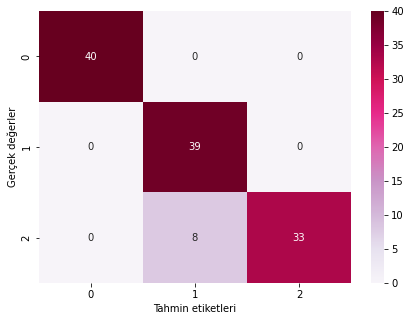

In [86]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(mat, annot=True, fmt='.0f', cmap='PuRd')
plt.ylabel('Gerçek değerler')#y eksemi
plt.xlabel('Tahmin etiketleri')#x ekseni

In [87]:
from sklearn.metrics import classification_report
target_names=["Iris-setosa ","Iris-versicolor","Iris-virginica"]
print(classification_report(y_test, y_pred,target_names=target_names))

                 precision    recall  f1-score   support

   Iris-setosa        1.00      1.00      1.00        40
Iris-versicolor       0.83      1.00      0.91        39
 Iris-virginica       1.00      0.80      0.89        41

       accuracy                           0.93       120
      macro avg       0.94      0.93      0.93       120
   weighted avg       0.94      0.93      0.93       120



In [88]:
#Destek vektör makineleri

In [89]:
from sklearn.svm import SVC 
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
svm.predict(X_test)
svmc=svm.score(X_test,y_test)
svmc

0.9416666666666667

In [90]:
y_pred=svm.predict(X_test)

Text(0.5, 24.0, 'Tahmin etiketleri')

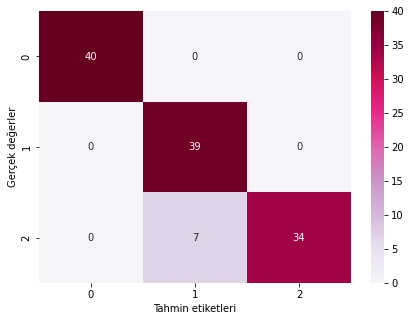

In [91]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(mat, annot=True, fmt='.0f', cmap='PuRd')
plt.ylabel('Gerçek değerler')#y eksemi
plt.xlabel('Tahmin etiketleri')#x ekseni

In [92]:
from sklearn.metrics import classification_report
target_names=["Iris-setosa ","Iris-versicolor","Iris-virginica"]
print(classification_report(y_test, y_pred,target_names=target_names))

                 precision    recall  f1-score   support

   Iris-setosa        1.00      1.00      1.00        40
Iris-versicolor       0.85      1.00      0.92        39
 Iris-virginica       1.00      0.83      0.91        41

       accuracy                           0.94       120
      macro avg       0.95      0.94      0.94       120
   weighted avg       0.95      0.94      0.94       120



In [93]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.predict(X_test)

rf= RandomForestClassifier()
rf.fit(X_train,y_train)
rf.predict(X_test)
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.predict(X_test)
nb=GaussianNB()
nb.fit(X_train,y_train)
nb.predict(X_test)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)

from sklearn.svm import SVC 
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
svm.predict(X_test)
Voting=VotingClassifier(estimators=[('ln',lr),('svc',svm),('nb',nb),('knn',knn),('rf',rf),('dt',dt)],voting='hard').fit(X_train, y_train)



In [94]:
print('knn =',knnc)
print('rf =',rfc)
print('ln =',lrc)
print('nb =',nbc)
print('svc =',svmc)
print('ensemble VotingClassifier',Voting.score(X_test,y_test))

knn = 0.8833333333333333
rf = 0.9166666666666666
ln = 0.8666666666666667
nb = 0.9333333333333333
svc = 0.9416666666666667
ensemble VotingClassifier 0.9083333333333333


In [95]:
y_pred=Voting.predict(X_test)

Text(0.5, 24.0, 'Tahmin etiketleri')

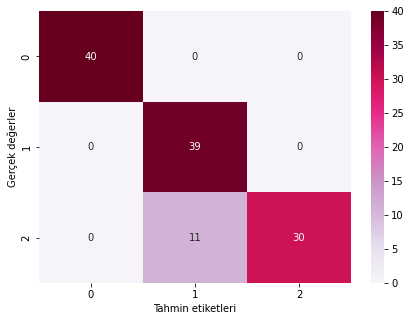

In [96]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(mat, annot=True, fmt='.0f', cmap='PuRd')
plt.ylabel('Gerçek değerler')#y eksemi
plt.xlabel('Tahmin etiketleri')#x ekseni

In [97]:
from sklearn.metrics import classification_report
target_names=["Iris-setosa ","Iris-versicolor","Iris-virginica"]

print(classification_report(y_test, y_pred,target_names=target_names))

                 precision    recall  f1-score   support

   Iris-setosa        1.00      1.00      1.00        40
Iris-versicolor       0.78      1.00      0.88        39
 Iris-virginica       1.00      0.73      0.85        41

       accuracy                           0.91       120
      macro avg       0.93      0.91      0.91       120
   weighted avg       0.93      0.91      0.91       120



In [98]:
print('ensemble VotingClassifier',Voting.score(X_test,y_test))


ensemble VotingClassifier 0.9083333333333333


In [99]:
"""from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train,y_train)
clf.predict(X_test)
clfc=clf.score(X_test,y_test)
clfc"""


'from sklearn.ensemble import VotingClassifier\n\nfrom sklearn.ensemble import RandomForestClassifier\nclf = RandomForestClassifier(n_estimators=10)\nclf = clf.fit(X_train,y_train)\nclf.predict(X_test)\nclfc=clf.score(X_test,y_test)\nclfc'

In [100]:
"""from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
estimators=[('knn =',knnc),('rf =',rf),('lr =',lrc),('nb =',nbc),('svm =',dvmc),('cls =',clsc)]
ensemble=VotingClassifier(estimators, voting='hard')
ens=ensemble.fit(X_train,y_train)
ensemble.score(X_test,y_test)


print('ensemble VotingClassifier',Voting.score(X_test,y_test))
print('ensemble RandomForestClassifier =',rndc)"""




"from sklearn.ensemble import VotingClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nestimators=[('knn =',knnc),('rf =',rf),('lr =',lrc),('nb =',nbc),('svm =',dvmc),('cls =',clsc)]\nensemble=VotingClassifier(estimators, voting='hard')\nens=ensemble.fit(X_train,y_train)\nensemble.score(X_test,y_test)\n\n\nprint('ensemble VotingClassifier',Voting.score(X_test,y_test))\nprint('ensemble RandomForestClassifier =',rndc)"

In [101]:
""""from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
ens = ensemble
ens.fit(X_train,y_train)
ens.predict(X_test)
ensc=ens.score(X_test,y_test)
ensc"""

'"from sklearn.ensemble import VotingClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nens = ensemble\nens.fit(X_train,y_train)\nens.predict(X_test)\nensc=ens.score(X_test,y_test)\nensc'

In [102]:
#from sklearn.ensemble import VotingClassifier
#Voting=VotingClassifier(estimators=[('ln',lr),('rf',rf)],voting='hard').fit(X_train, y_train)

In [103]:
"""estimators=[('knn =',knnc),('rf =',rf),('lr =',lrc),('nb =',nbc),('svm =',dvmc),('cls =',clsc)]
= est.set_params(estimators, warm_start=True)  
_ = est.fit(X_train, y_train) """
 

"estimators=[('knn =',knnc),('rf =',rf),('lr =',lrc),('nb =',nbc),('svm =',dvmc),('cls =',clsc)]\n= est.set_params(estimators, warm_start=True)  \n_ = est.fit(X_train, y_train) "

In [104]:
"""from sklearn.ensemble import 

estimators=[('knn =',knnc)
,('rf =',rf)
,('lr =',lrc)
,('nb =',nbc)
,('svm =',dvmc)]

voting=VotingClassifier(estimators,voting='hard').fit(X_train,y_train)"""


"from sklearn.ensemble import \n\nestimators=[('knn =',knnc)\n,('rf =',rf)\n,('lr =',lrc)\n,('nb =',nbc)\n,('svm =',dvmc)]\n\nvoting=VotingClassifier(estimators,voting='hard').fit(X_train,y_train)"

In [105]:
classifiers = [ ('knn =',knnc),
('rf =',rfc)
,('ln =',lrc)
,('nb =',nbc)
,('svc =',svmc) 
]

In [106]:
"""from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.predict(X_test)

rf= RandomForestClassifier()
rf.fit(X_train,y_train)
rf.predict(X_test)
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.predict(X_test)
nb=GaussianNB()
nb.fit(X_train,y_train)
nb.predict(X_test)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)

from sklearn.svm import SVC 
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
svm.predict(X_test)




for name, model in classifiers: 
     model.fit(X_train, y_train) 
     y_pred = model.predict(X_test) 
     acc = accuracy_score(y_test, y_pred) 
     print(name, acc ")""""

SyntaxError: EOL while scanning string literal (4037548898.py, line 40)

In [ ]:
"""vc = VotingClassifier(estimators = classifiers, voting = 'hard')
 
vc.fit(X_train, y_train)
 
y_pred = vc.predict(X_test)
 
vc_acc = accuracy_score(y_test, y_pred)
print("Topluluk öğrenme", vc_acc,"Şarap veri seti için")"""